## 关于新型冠状病毒和传染病模型
参考资料：[关于传染病的数学模型有哪些？ - 张戎的回答 - 知乎](https://www.zhihu.com/question/367466399/answer/985150406)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15.0

最近新型冠状病毒的传染牵动着你我的心。人们研究传染病已经研究了很久了，也提出了很多不同的数学模型。既然闲赋在家，不如找几个模型练练你（还有我）的数学建模和编程能力。

## SI模型 (Susceptible-Infectious)
在这个模型下，只有两种人，一种人容易易感染病毒，叫做易感者Susceptible $S(t)$，另一种人已经感染了病毒，叫做感染者Infectious $I(t)$。$I(t)$会向$S(t)$传染病毒。这两种人的数量变化满足以下微分方程。

$$\frac{dS}{dt} = -\frac{c \beta I}{N}S,\\ \frac{dI}{dt} = \frac{c \beta I}{N} S.$$
其中：

传染率 $\beta$: 表示感染者接触到易感者之后，易感者得病的概率；

接触率 $c$: 表示在每天感染者接触到的易感者人数。感染者每天去菜市场乱走的话，$c$就会很大。如果隔离措施做得好，$c$就很小。

总人数 $N$: 该封闭地区的总人数，$N = N(t) = I(t) + S(t)$.

这是一个一阶线性微分方程组。

**（1）利用$S = N - I$，将该方程组化简为一个关于$I(t)$的微分方程。**

甭管你算没算对，化简完应该是
$$\frac{dI}{dt} = c\beta (I - I^2/N)$$

**(2) 下面我演示了如何利用scipy中的odeint函数解该微分方程。请研究代码（不懂的去查），并描述接触率和传染率的变化如何影响疫情发展**

In [2]:
from scipy.integrate import odeint
def SImodel(point, t, params):
    """
    point：自变量
    params：参数
    """
    c, beta, N = params
    I = point
    return c * beta * (I - I**2 / N)

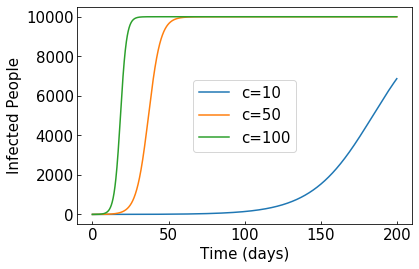

In [3]:
plt.rcParams['font.size'] = 15.0

t = np.arange(0, 200, 0.1)    # 200天
N = 10000 # 一共一万人
beta = 0.005 # 传染率还是很低的
for c in [10, 50, 100]:   # 如果接触率分别为200人/天，500人/天，1000人/天，疫情会有什么不同
    P = odeint(SImodel, 1.0, t,      # 最开始只有一个人感染，所以是1.0
               args=([c, beta, N],)) # 三个数分别为c, beta, N
    plt.plot(t, P, label='c={}'.format(c))

plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Infected People')
plt.tick_params(direction='in')

(0, 10500.0)

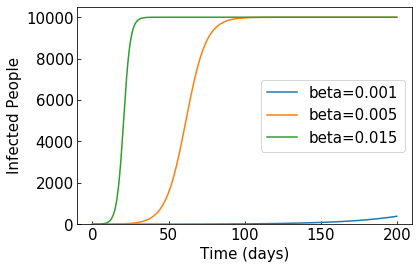

In [4]:
t = np.arange(0, 200, 0.1)    # 200天
N = 10000 # 一共一万人
c = 30    # 每天接触30个人
for beta in [0.001, 0.005, 0.015]:   # 如果接触率分别为200人/天，500人/天，1000人/天，疫情会有什么不同
    P = odeint(SImodel, 1.0, t,      # 最开始只有一个人感染，所以是1.0
               args=([c, beta, N],)) # 三个数分别为c, beta, N
    plt.plot(t, P, label='beta={}'.format(beta))

plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Infected People')
plt.tick_params(direction='in')
plt.ylim(0, 1.05e4)

## SIS模型 (Susceptible-Infectious-Susceptible)
在这个模型下，还是只有两种人，但是感染者可以被治好，治好之后变回易感者（感冒就是这个亚子）。这两种人的数量变化满足以下微分方程。

$$\frac{dS}{dt} = -\frac{c \beta I}{N}S + \gamma I,\\ \frac{dI}{dt} = \frac{c \beta I}{N} S - \gamma I.$$

其中：

传染率 $\beta$: 表示感染者接触到易感者之后，易感者得病的概率；

接触率 $c$: 表示在每天感染者接触到的易感者人数。感染者每天去菜市场乱走的话，$c$就会很大。如果隔离措施做得好，$c$就很小。

治愈率 $\gamma$: 表示感染者被治愈的概率；

总人数 $N$: 该封闭地区的总人数，$N = N(t) = I(t) + S(t)$.

这是一个一阶线性微分方程组。

**（3）利用$S = N - I$，将该方程组化简为一个关于$I(t)$的微分方程。**

甭管你算没算对，化简完应该是
$$\frac{dI}{dt} = c\beta (I - I^2/N) - \gamma I$$

**(4) 如果你认真学习了之前的例子，就可以自己独立完成SIS这个例子。请补全下面的函数，并研究治愈率$\gamma$如何影响疫情传播。治愈率最大可以是多少？？（别告诉我是一万哈😂）**

In [5]:
def SISmodel(point, t, params):
    """
    point：自变量
    params：参数
    """
    c, gamma, beta, N = params
    I = point
    return (c * beta - gamma) * I - c * beta * I**2 / N

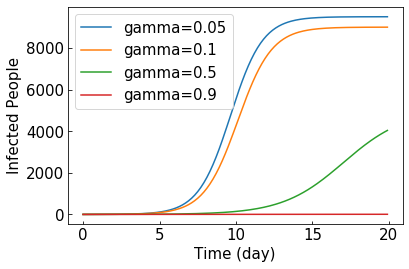

In [6]:
# 模仿之前的例子，画出不同治愈率gamma时的感染曲线，并讨论治愈率的重要性。
t = np.arange(0, 20, 0.1)
for gamma in [0.05, 0.1, 0.5, 0.9]:
    P = odeint(SISmodel, 1., t, args=([200, gamma, 0.005, 10000],))  #
    plt.plot(t, P, label='gamma={}'.format(gamma))
plt.legend()
plt.xlabel('Time (day)')
plt.ylabel('Infected People')
plt.tick_params(direction='in')

## SIR模型 (Susceptible-Infectious-Recovered)
在这个模型下，有三种人。感染者可以被治好，治好之后就都变成了有抗体的健康人 $R(t)$（不再是易感人群）。例子比如水痘啊之类的（你得过水痘吗？）。这三种人的数量变化满足以下微分方程。

$$\frac{dS}{dt} = -\frac{c \beta I}{N}S,\\ \frac{dI}{dt} = \frac{c \beta I}{N} S - \gamma I,\\ \frac{dR}{dt} = \gamma I.$$

其中：

传染率 $\beta$: 表示感染者接触到易感者之后，易感者得病的概率；

接触率 $c$: 表示在每天感染者接触到的易感者人数。感染者每天去菜市场乱走的话，$c$就会很大。如果隔离措施做得好，$c$就很小。

治愈率 $\gamma$: 表示感染者被治愈的概率；

总人数 $N$: 该封闭地区的总人数，$N = N(t) = I(t) + S(t) + R(t)$.

这是一个一阶线性微分方程组。

**(5) 这里就没法写成一个单独的微分方程了。我已经给你补全了下面的函数，请把它搞明白。**

In [7]:
def SIRmodel(point, t, params):
    """
    point：自变量
    params：参数
    这里自变量有两个，所以return的是一个拥有两个元素的array。
    """
    c, gamma, beta, N = params
    I, S = point
    if I + S <= N:  # 请解释这一句在干什么？
        return np.array([c * beta * S * I / N - gamma * I, - c * beta * S * I / N]) 
    else:
        return None

**(6) 微博上的“[于晓华_经济](https://weibo.com/u/1684992301)”就是在这种模型下模拟了2019nCoV的疫情。他根据SARS时期的数据断言 $\gamma = 0.0821$, $c = 100$ 人/天, $\beta = 0.002865$. 武汉有一千万人，最开始在华南海鲜市场里有10个人感染新型冠状病毒，而且最开始没有人具有抗体。这里假设第一例病毒感染是从12月20日开始的。请研究这种情况下疫情如何发展，什么时候感染的人最多？什么时候疫情开始缓和？你的结果和他微博上的结果一样吗？**

In [6]:
# 提示：这里有方便算时间天数间隔的函数
import pandas as pd
print(pd.datetime(2019, 12, 20) + pd.datetools.timedelta(days=30))
print(pd.datetime(2020, 1, 23) - pd.datetime(2019, 12, 20))

2020-01-19 00:00:00
34 days, 0:00:00


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until


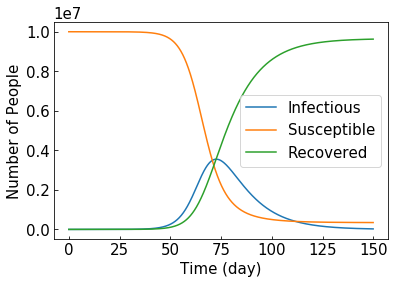

In [10]:
t = np.arange(0, 150, 0.1)
N = 1e7 + 10
P = odeint(SIRmodel, (10, 1e7), t, args=([100, 0.0821, 0.002865, N],))
plt.plot(t, P[:, 0], label='Infectious')
plt.plot(t, P[:, 1], label='Susceptible')
plt.plot(t, (N - P[:, 1] - P[:, 0]), label='Recovered')
plt.legend()
plt.xlabel('Time (day)')
plt.ylabel('Number of People')
plt.tick_params(direction='in')
#plt.ylim(0, 4e4)

**(7) SIR模型有什么局限性？**

没有潜伏期、没有死亡、没有地域流动

## 引入隔离后的SIR模型
上面的SIR模型预测的结果是在75天左右，感染的人数会达到最多，而且接近400万人。这个骇人的数字害得我睡不着觉。思来想去，觉得中国政府中央集权的优越性必须要在这个时候体现出来。1月23日，武汉宣布封城，后来湖北所有地级市全部封城。简化起见，我们这里不考虑宏观人口流动的影响，把封城和隔离的作用全部归结于减小了接触率$c$。另一方面，戴口罩和勤洗手可以有效减少传染率$\beta$。

在以下假设下考虑疫情的传播。在$t=34$天的时候，武汉封城，接触率$c$开始指数下降 ($c_0$是原来没有封城时候的接触率)：
$$ c(t) = (0.9 e^{-(t - 34) / 5} + 0.1)\ c_0 .$$

传染率也因为戴口罩而指数下降 ($\beta_0$是原来没有封城时候的接触率)：
$$ \beta(t) = (0.9 e^{-(t - 30) / 5} + 0.05)\ \beta_0 .$$


In [4]:
def NewSIRmodel(point, t, params):
    """
    point：自变量
    params：参数
    这里自变量有两个，所以return的是一个拥有两个元素的array。
    """
    c, gamma, beta, N = params
    I, S = point
    if t > 34:
        c *= 0.9 * np.exp(-(t - 34) / 5) + 0.1
        beta *= 0.9 * np.exp(-(t - 34) / 5) + 0.05
    if I + S <= N:
        return np.array([c * beta * S * I / N - gamma * I, - c * beta * S * I / N]) 
    else:
        return None

**(8) 在这样的假设下，解释为什么$\beta$下降的式子中是t-30而非t-34？并解释 (t-30)/5 这个除以5的5对疫情有什么影响？如果是除以3呢？疫情会更快变好吗？**

因为大家戴口罩比武汉封城早个三四天。5那个数是政策生效的时标，改成3意味着政策生效越快，疫情自然会越好。

**(9) 在以上这些假设下，讨论新型冠状病毒的传播情况。封城和戴口罩双管齐下之后，还会有那么多人感染吗？以及什么时候疫情会变得更好？正月十五之前会变好吗？**

In [7]:
print(pd.datetime(2020, 2, 8) - pd.datetime(2019, 12, 20))

50 days, 0:00:00


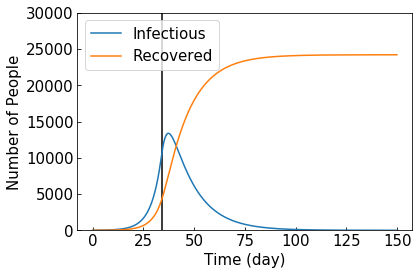

In [12]:
t = np.arange(0, 150, 0.1)
N = 1e7 + 10
P = odeint(NewSIRmodel, (10, 1e7), t, args=([100, 0.0821, 0.002865, N],))  #
plt.plot(t, P[:, 0], label='Infectious')
#plt.plot(t, P[:, 1], label='Susceptible')
plt.plot(t, (N - P[:, 1] - P[:, 0]), label='Recovered')
plt.legend()
plt.xlabel('Time (day)')
plt.ylabel('Number of People')
plt.tick_params(direction='in')
plt.ylim(0, 3e4)
#plt.vlines(34, 0, 3e4)

**(10) 我们讨论了这么多模型，它们有什么共同的缺陷？**

## 拓展阅读：SEIR模型 (Susceptible-Exposed-Infectious-Recovered)
在这个模型下，有四种人，多了一种人叫做潜伏者，exposed.

$$\frac{dS}{dt} = -\frac{c \beta I}{N}S,\\ \frac{dE}{dt} = \frac{c \beta I}{N} S - \sigma E, \\ \frac{dI}{dt} = \sigma E - \gamma I,\\ \frac{dR}{dt} = \gamma I.$$

其中：

传染率 $\beta$: 表示感染者接触到易感者之后，易感者得病的概率；

接触率 $c$: 表示在每天感染者接触到的易感者人数。感染者每天去菜市场乱走的话，$c$就会很大。如果隔离措施做得好，$c$就很小。

治愈率 $\gamma$: 表示感染者被治愈的概率；

潜伏期 $\sigma$: 是潜伏时长的倒数，这里设置为5天；

总人数 $N$: 该封闭地区的总人数，$N = N(t) = I(t) + S(t) + R(t)$.

这是一个一阶线性微分方程组。

In [83]:
def SEIRmodel(point, t, params):
    """
    point：自变量
    params：参数
    这里自变量有两个，所以return的是一个拥有两个元素的array。
    """
    c, gamma, beta, sigma, N = params
    I, S, E = point
    
    if I + S + E <= N:
        return np.array([sigma * E - gamma * I, - c * beta * S * I / N, c * beta * S * I / N - sigma * E]) 
    else:
        return None

这里没有让大家戴口罩和封锁湖北省。可以看到，有潜伏期的情况下，爆发时间变为了第130天左右。

(0, 10000000.0)

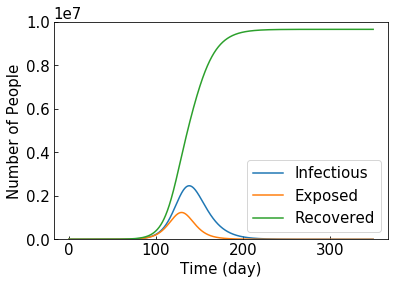

In [84]:
t = np.arange(0, 350, 0.1)
N = 1e7 + 10
P = odeint(SEIRmodel, (10, 1e7, 0), t, args=([100, 0.0821, 0.002865, 1/5, N],))  #
plt.plot(t, P[:, 0], label='Infectious')
plt.plot(t, P[:, 2], label='Exposed')
plt.plot(t, (N - P[:, 1] - P[:, 0]), label='Recovered')
plt.legend()
plt.xlabel('Time (day)')
plt.ylabel('Number of People')
plt.tick_params(direction='in')
plt.ylim(0, 1e7)